In [1]:
from common_config import *
LISATS_ROOT_PATH = "/media/angelo/DATA/dataset_parsing/LISA_TS/"
COMBINED_ANNOTATIONS_FILE_PATH = LISATS_ROOT_PATH + "allAnnotations.csv"

In [2]:
def simplify_class(raw_annotation):
    clean_annotation = ""

    if "Urdbl" in raw_annotation:
        clean_annotation = raw_annotation[:-5]
    elif raw_annotation[-2].isnumeric():
        clean_annotation = raw_annotation[:-2]
    else:
        clean_annotation = raw_annotation

    # dataset authors didn't notice that they had the same sign labeled differently.
    if clean_annotation == "thruTrafficMergeLeft":     
        clean_annotation = "thruMergeLeft"

    return clean_annotation


In [3]:
annotations_df = pd.read_csv(
    COMBINED_ANNOTATIONS_FILE_PATH, sep=",", header=0, usecols=[0, 1, 2, 3, 4, 5])

# cleans up labels. This is WIP while more things are being decided
annotations_df["Annotation"] = annotations_df.apply(
    lambda row: simplify_class(row["Annotation tag"]), axis=1)

'aiua120214-1/frameAnnotations-DataLog02142012_001_external_camera.avi_annotations/thruMergeLeft_1331865938.avi_image0.png'

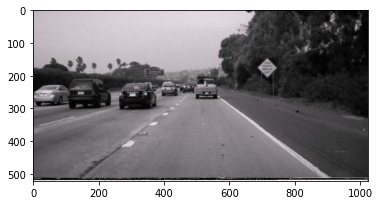

In [4]:
a = annotations_df[annotations_df.Annotation == "thruMergeLeft"]
img_a = read_img(LISATS_ROOT_PATH+a.iloc[0][0])
fig, ax = plt.subplots(1)
ax.imshow(img_a)
a.iloc[0][0]

In [5]:
# b = annotations_df[annotations_df.Annotation == "thruTrafficMergeLeft"]
# img_b = read_img(LISATS_ROOT_PATH+b.iloc[0][0])
# fig, ax = plt.subplots(1)
# ax.imshow(img_b)
# b.iloc[0][0]

Conclusion: thruTrafficMergeLeft and thruMergeLeft are the same signs! Database authors are HIGH!

In [6]:
signs_to_drop = [
    "truckSpeedLimit",
    "rampSpeedAdvisory",
    "zoneAhead",
    "dip",
    "addedLane"
]
annotations_df.drop(annotations_df[annotations_df["Annotation"].isin(signs_to_drop)].index, axis=0, inplace=True)

In [7]:
c = annotations_df[annotations_df.Annotation == "addedLane"]
labels = list(annotations_df["Annotation"].unique())
print(len(labels))

labels_set = set(labels)
names_set = set(get_classes())

26


set()